In [1]:
df <- read.csv("E:/Machine Learning/Datasets/College_Classification.csv")

In [2]:
dim(df)

[1] 387  17

In [3]:
summary(df)

  college_code     division         cutoff         courses      
 Min.   :1002   Min.   :1.000   Min.   : 2.45   Min.   : 1.000  
 1st Qu.:3200   1st Qu.:3.000   1st Qu.:57.92   1st Qu.: 5.000  
 Median :4649   Median :4.000   Median :75.18   Median : 6.000  
 Mean   :4543   Mean   :4.253   Mean   :71.75   Mean   : 7.189  
 3rd Qu.:6268   3rd Qu.:6.000   3rd Qu.:87.98   3rd Qu.: 9.000  
 Max.   :6991   Max.   :6.000   Max.   :99.91   Max.   :41.000  
                                NA's   :10                      
     intake            fees             salary            rating     
 Min.   :   6.3   Min.   :   3750   Min.   : 120000   Min.   :1.000  
 1st Qu.: 240.0   1st Qu.: 240000   1st Qu.: 240000   1st Qu.:3.500  
 Median : 300.0   Median : 308000   Median : 300000   Median :3.800  
 Mean   : 382.0   Mean   : 322662   Mean   : 360634   Mean   :3.666  
 3rd Qu.: 420.0   3rd Qu.: 372500   3rd Qu.: 390000   3rd Qu.:4.000  
 Max.   :2274.0   Max.   :1880000   Max.   :1650000   Max.  

* cutoff, intake, fees, salary, rating, infrastructure, faculty, crowd have missing values
* we need to create dummy variables for hostel variable

# Data Preprocessing

## 1. Dummy variable creation

In [4]:
library(fastDummies)
df <- dummy_cols(df, select_column="hostel")
which(colnames(df) == "hostel")
which(colnames(df) == "hostel_NONE")

Thank you for using fastDummies!

To acknowledge our work, please cite the package:

Kaplan, J. & Schlegel, B. (2023). fastDummies: Fast Creation of Dummy (Binary) Columns and Rows from Categorical Variables. Version 1.7.1. URL: https://github.com/jacobkap/fastDummies, https://jacobkap.github.io/fastDummies/.



[1] 12

[1] 19

In [5]:
df <- df[,-19]
df <- df[,-12]

## 2. Missing value imputation

In [6]:
df$cutoff[is.na(df$cutoff)] <- mean(df$cutoff, na.rm=TRUE)
df$intake[is.na(df$intake)] <- mean(df$intake, na.rm=TRUE)
df$fees[is.na(df$fees)] <- mean(df$fees, na.rm=TRUE)
df$salary[is.na(df$salary)] <- mean(df$salary, na.rm=TRUE)
df$rating[is.na(df$rating)] <- mean(df$rating, na.rm=TRUE)
df$infrastructure[is.na(df$infrastructure)] <- mean(df$infrastructure, na.rm=TRUE)
df$faculty[is.na(df$faculty)] <- mean(df$faculty, na.rm=TRUE)
df$crowd[is.na(df$crowd)] <- mean(df$crowd, na.rm=TRUE)

In [7]:
# Rounding off the intake variable values upto 1 decimal places
df$intake <- round(df$intake, digits=1)

# Test-Train Split

In [8]:
require("caTools")
set.seed(0)
split <- sample.split(df, SplitRatio = 0.7)
train <- subset(df, split == TRUE)
test <- subset(df, split == FALSE)

Loading required package: caTools



In [9]:
dim(train)
dim(test)

[1] 257  18

[1] 130  18

# Logistic Regression

In [11]:
train.fit <- glm(admission~. -college_code, data=train, family=binomial)
test.probs <- predict(train.fit, test, type='response')
test.pred <- rep('NO', 130)
test.pred[(test.probs > .5)] = 'YES'
table(test.pred, test$admission)

         
test.pred  0  1
      NO  63 10
      YES  4 53

In [12]:
116/130

[1] 0.8923077

# Linear Discriminant Analysis

In [13]:
library(MASS)
trainLDA <- lda(admission~.-college_code, data=train)
test.predict <- predict(trainLDA, test)
test.predict$posterior
test.class <- test.predict$class
table(test.class, test$admission)

,0,1
1,0.003974112,9.960259e-01
5,0.110340711,8.896593e-01
7,0.994953453,5.046547e-03
8,0.735607620,2.643924e-01
16,0.998950262,1.049738e-03
18,0.906970400,9.302960e-02
19,0.949581266,5.041873e-02
23,0.995313179,4.686821e-03
25,0.999970963,2.903655e-05
26,0.770856567,2.291434e-01


          
test.class  0  1
         0 65 13
         1  2 50

In [14]:
115/130

[1] 0.8846154

# K nearest neighbours

In [15]:
library(class)
which(colnames(train) == "admission")
which(colnames(test) == "admission")

[1] 16

[1] 16

In [16]:
trainX <- train[,-16]
testX <- test[,-16]
trainY <- train$admission
testY <- test$admission

trainX_s <- scale(trainX)
testX_s <- scale(testX)
set.seed(0)

In [17]:
# k=3
knn.pred <- knn(trainX_s, testX_s, trainY, k=3)
table(knn.pred,testY)

        testY
knn.pred  0  1
       0 62 13
       1  5 50

In [18]:
112/130

[1] 0.8615385

In [19]:
# k=5
knn.pred <- knn(trainX_s, testX_s, trainY, k=5)
table(knn.pred,testY)

        testY
knn.pred  0  1
       0 63 13
       1  4 50

In [20]:
113/130

[1] 0.8692308

In [21]:
# k=7
knn.pred <- knn(trainX_s, testX_s, trainY, k=7)
table(knn.pred,testY)

        testY
knn.pred  0  1
       0 63 12
       1  4 51

In [22]:
114/130

[1] 0.8769231

In [23]:
# k=10
knn.pred <- knn(trainX_s, testX_s, trainY, k=10)
table(knn.pred,testY)

        testY
knn.pred  0  1
       0 63 11
       1  4 52

In [24]:
115/130

[1] 0.8846154

In [25]:
# k=16 (optimum k from thumb rule)
knn.pred <- knn(trainX_s, testX_s, trainY, k=16)
table(knn.pred,testY)

        testY
knn.pred  0  1
       0 62 13
       1  5 50

In [26]:
112/130

[1] 0.8615385

# Decision Tree

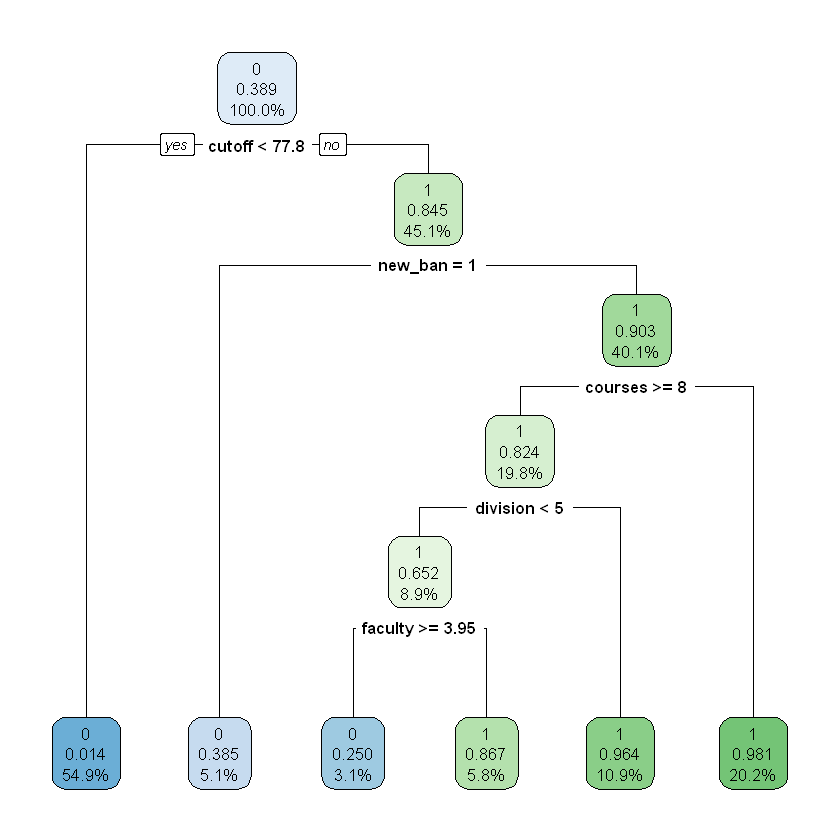

In [27]:
library(rpart)
library(rpart.plot)
classtree <- rpart(admission~.-college_code, data=train, method="class", control=rpart.control(maxdepth = 6))
rpart.plot(classtree, digits=-3)

In [28]:
# Predicting values on test set
test$decision <- predict(classtree, test, type="class")
View(test)
table(test$admission, test$decision)


,college_code,division,cutoff,courses,intake,fees,salary,rating,infrastructure,faculty,crowd,government,autonomous,rank,new_ban,admission,hostel_BOTH,hostel_ONE,decision
,<int>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<fct>
1,1002,1,96.44000,8,300,240000,390000.0,3.400000,3.200000,3.500000,3.700000,1,1,301,0,1,1,0,1
5,1105,1,88.05000,8,480,440000,330000.0,3.900000,4.000000,3.900000,4.200000,0,1,250,0,1,0,0,1
7,1108,1,43.04000,5,300,310000,300000.0,3.900000,4.000000,4.300000,3.500000,0,0,301,0,0,1,0,0
8,1114,1,81.55000,6,300,320000,370000.0,4.000000,4.400000,3.900000,4.200000,0,0,301,0,1,1,0,1
16,1124,1,49.08000,5,300,490000,230000.0,3.600000,4.300000,3.600000,3.500000,0,0,301,1,0,1,0,0
18,1126,1,67.71000,5,300,170000,490000.0,5.000000,5.000000,5.000000,5.000000,0,0,301,0,0,1,0,0
19,1127,1,62.39000,5,150,330000,190000.0,3.600000,3.000000,3.000000,3.500000,0,0,301,0,0,1,0,0
23,1180,1,49.05000,5,270,320000,360633.9,2.600000,3.000000,2.000000,3.000000,0,0,301,0,0,0,0,0
25,1251,1,16.73000,6,300,284000,280000.0,3.400000,3.200000,3.400000,3.600000,0,0,301,1,0,1,0,0


   
     0  1
  0 66  1
  1 18 45

In [29]:
111/130

[1] 0.8538462

# Bagging

In [30]:
library(randomForest)
train$admission <- as.factor(train$admission)
bagging <- randomForest(admission~.-college_code, method="class", data=train, mtry=16)
test$bagging <- predict(bagging, test, type="response")
table(test$admission, test$bagging) 

randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.



   
     0  1
  0 62  5
  1 13 50

In [31]:
112/130

[1] 0.8615385

# Random Forest

In [33]:
randomforest <- randomForest(admission~., data=train, ntree=500)
test$randomforest <- predict(randomforest, test, type="class")
table(test$admission, test$randomforest)

   
     0  1
  0 62  5
  1 10 53

In [34]:
115/130

[1] 0.8846154

# Gradient Boost

In [35]:
library(gbm)
set.seed(0)
test$admission <- as.factor(test$admission)
boosting <- gbm(admission~., data=train, distribution="multinomial", n.trees=1000, interaction.depth=4, shrinkage=0.2, verbose = F)
test$pregrad <- predict(boosting, test, n.trees=1000, type="response")
class_names = colnames(test$pregrad)[apply(test$pregrad, 1, which.max)]
table(test$admission, as.factor(class_names))

Loaded gbm 2.1.8.1

Warning message:
"Setting `distribution = "multinomial"` is ill-advised as it is currently broken. It exists only for backwards compatibility. Use at your own risk."


   
     0  1
  0 64  3
  1 11 52

In [36]:
116/130

[1] 0.8923077

# Adaptive Boost

In [37]:
library(adabag)
adaboost <- boosting(admission~.-college_code, data=train, boos=TRUE)
predada <- predict(adaboost, test)
table(predada$class, test$admission)

Loading required package: caret

Loading required package: ggplot2


Attaching package: 'ggplot2'


The following object is masked from 'package:randomForest':

    margin


Loading required package: lattice

Loading required package: foreach

Loading required package: doParallel

Loading required package: iterators

Loading required package: parallel



   
     0  1
  0 65  9
  1  2 54

In [38]:
119/130

[1] 0.9153846

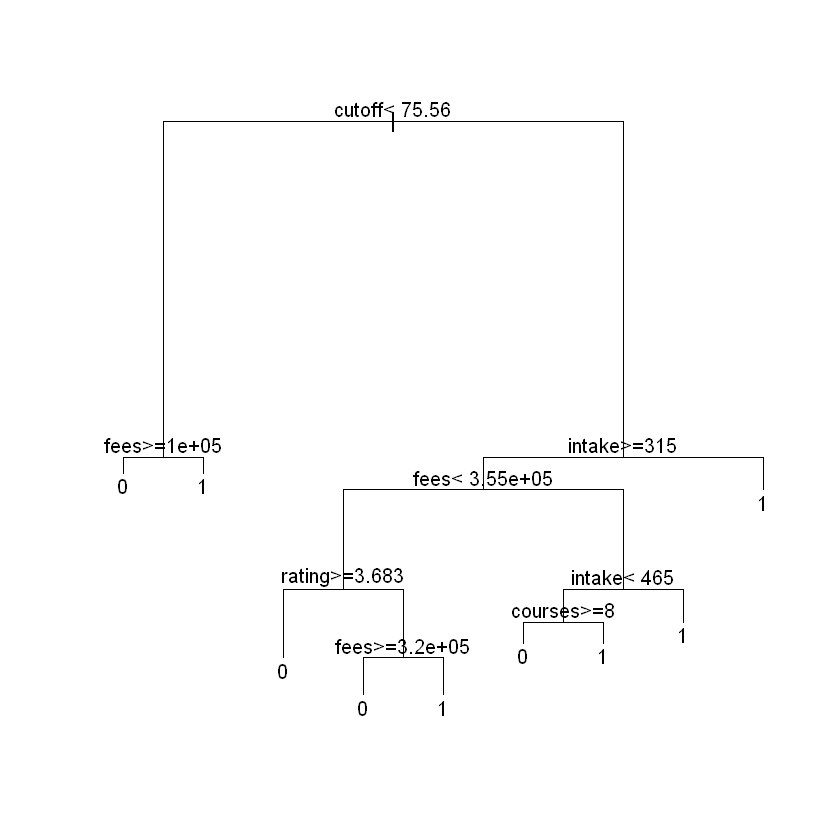

In [39]:
t1 <- adaboost$trees[[5]]
plot(t1)
text(t1, pretty=100)

# XG BOOST

In [14]:
library(xgboost)
trainY <- train$admission=="1"
trainX <- model.matrix(admission~. -college_code, data=train)
trainX <- trainX[,-16]

testY <- test$admission=="1"
testX <- model.matrix(admission~. -college_code, data=test)
testX <- testX[,-16]

Xmatrix_train <- xgb.DMatrix(data=trainX, label=trainY)
Xmatrix_test <- xgb.DMatrix(data=testX, label=testY)
Xgboosting <- xgboost(data=Xmatrix_train, nround=50, objective ="multi:softmax", eta=0.3, num_class=2, max_depth=100)
xgpred <- predict(Xgboosting, Xmatrix_test)
table(testY, xgpred) 

[1]	train-mlogloss:0.466872 
[2]	train-mlogloss:0.345553 
[3]	train-mlogloss:0.261560 
[4]	train-mlogloss:0.202363 
[5]	train-mlogloss:0.158981 
[6]	train-mlogloss:0.126879 
[7]	train-mlogloss:0.102704 
[8]	train-mlogloss:0.084225 
[9]	train-mlogloss:0.071468 
[10]	train-mlogloss:0.060947 
[11]	train-mlogloss:0.053008 
[12]	train-mlogloss:0.046497 
[13]	train-mlogloss:0.041808 
[14]	train-mlogloss:0.037153 
[15]	train-mlogloss:0.033441 
[16]	train-mlogloss:0.030745 
[17]	train-mlogloss:0.027983 
[18]	train-mlogloss:0.026119 
[19]	train-mlogloss:0.024188 
[20]	train-mlogloss:0.022708 
[21]	train-mlogloss:0.021219 
[22]	train-mlogloss:0.020226 
[23]	train-mlogloss:0.019427 
[24]	train-mlogloss:0.018568 
[25]	train-mlogloss:0.017915 
[26]	train-mlogloss:0.017290 
[27]	train-mlogloss:0.016841 
[28]	train-mlogloss:0.016316 
[29]	train-mlogloss:0.015857 
[30]	train-mlogloss:0.015403 
[31]	train-mlogloss:0.014942 
[32]	train-mlogloss:0.014532 
[33]	train-mlogloss:0.014187 
[34]	train-mlogloss

       xgpred
testY    0  1
  FALSE 66  1
  TRUE  13 50

In [15]:
117/130

[1] 0.9

# Support Vector Machines

### 1. Linear Kernel

In [47]:
library(e1071)
svmfit = svm (admission~.-college_code, data=train , kernel = "linear", cost =1 ,scale = TRUE)
 
## To check the support vectors
svmfit$index

[1]   1   3  41  46  61  63  71  75  76  79  88  91  96 101 131 138 144 149 159
[20] 160 171 179 216 223 229 237 240 241 249 251 252   2   4   9  13  23  25  48
[39]  60  77  87  89 100 111 130 136 139 143 148 150 156 165 173 176 184 185 187
[58] 190 194 195 197 199 206 220 231 246 255

In [48]:
## Finding best value of C / Tuning the hyperparameter
set.seed (0)
tune.out = tune(svm, admission~.,data=train ,kernel="linear", ranges =list(cost=c(0.001 , 0.01, 0.1, 1,10,100)))
bestmod = tune.out$best.model
summary (bestmod)


Call:
best.tune(METHOD = svm, train.x = admission ~ ., data = train, ranges = list(cost = c(0.001, 
    0.01, 0.1, 1, 10, 100)), kernel = "linear")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  linear 
       cost:  0.1 

Number of Support Vectors:  99

 ( 48 51 )


Number of Classes:  2 

Levels: 
 0 1




In [49]:
ypredL=predict (bestmod ,test)
table(predict=ypredL , truth=test$admission) 

       truth
predict  0  1
      0 65 12
      1  2 51

In [50]:
116/130

[1] 0.8923077

### 2. Polynomial Kernel

In [51]:
svmfitP = svm(admission~.-college_code, data=train , kernel ="polynomial", cost=1, degree=2)
# Hyperparameter Tuning
tune.outP=tune(svm ,admission~.,data=train, cross = 4, kernel="polynomial", ranges =list(cost=c(0.001,0.1, 1,5,10),degree=c(0.5,1,2,3,5,10) ))
bestmodP =tune.outP$best.model
summary (bestmodP)


Call:
best.tune(METHOD = svm, train.x = admission ~ ., data = train, ranges = list(cost = c(0.001, 
    0.1, 1, 5, 10), degree = c(0.5, 1, 2, 3, 5, 10)), cross = 4, 
    kernel = "polynomial")


Parameters:
   SVM-Type:  C-classification 
 SVM-Kernel:  polynomial 
       cost:  5 
     degree:  1 
     coef.0:  0 

Number of Support Vectors:  79

 ( 39 40 )


Number of Classes:  2 

Levels: 
 0 1

4-fold cross-validation on training data:

Total Accuracy: 91.05058 
Single Accuracies:
 84.375 95.3125 92.1875 92.30769 




In [52]:
ypredP = predict (bestmodP,test)
table(predict = ypredP, truth = test$admission)

       truth
predict  0  1
      0 65 13
      1  2 50

In [53]:
115/130

[1] 0.8846154

Since the degree obtained from Polynomial Kernel is 1, the Kernel is Linear, so we consider the accuracy of the Linear kernel and we won't be further moving towards the other kernels

# Conclusion

The Adaptive Boost model provides the best accuracy of 91.53% on the test set and its predicted values are best suited for finding out whether a student will take admission in a particular college or not